In [1]:
import warnings
import logging
logging.disable(logging.DEBUG)
logging.disable(logging.WARNING)
warnings.simplefilter('ignore')

from deeppavlov.models.embedders.fasttext_embedder import FasttextEmbedder
from deeppavlov.models.embedders.tfidf_weighted_embedder import TfidfWeightedEmbedder

from deepPavlovEval import Evaluator
from models import TfidfEmbedder, ELMoEmbedder

[nltk_data] Downloading package punkt to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [2]:
evaluator = Evaluator()

In [3]:
# _ = evaluator.load_results('results/results.jsonl')

In [3]:
%%time
fastText = FasttextEmbedder('/data/embeddings/wiki.ru.bin', mean=True)
evaluator.evaluate(fastText, model_name='fastText (mean)')
del fastText

CPU times: user 50.1 s, sys: 5.16 s, total: 55.2 s
Wall time: 1min 27s


In [4]:
%%time
fastText = FasttextEmbedder('/data/embeddings/wiki.ru.bin', mean=False)
fastTextTfidf = TfidfWeightedEmbedder(embedder=fastText,
                                      counter_vocab_path='/data/vocabs/counts_wiki_lenta.txt',
                                      mean=True)
evaluator.evaluate(fastTextTfidf, model_name='fastText (tf-idf weighted)')
del fastTextTfidf
del fastText

CPU times: user 54.2 s, sys: 3.27 s, total: 57.4 s
Wall time: 56.6 s


In [2]:
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/news-diff-io_epoches_n_10.tar.gz")

Using TensorFlow backend.


In [5]:
elmo([['привет', 'друг']])

[array([[ 0.260464  ,  0.04417771, -0.73870224, ..., -0.6093756 ,
          0.6282548 ,  0.34272158],
        [ 0.26352575,  0.03488201, -0.8627626 , ..., -0.8020436 ,
          0.22484213,  0.08132686]], dtype=float32)]

In [5]:
%%time
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/news-diff-io_epoches_n_10.tar.gz",
                    mean=True)
evaluator.evaluate(elmo, model_name='ELMo (mean)')
del elmo

Using TensorFlow backend.


CPU times: user 6min 47s, sys: 35.3 s, total: 7min 22s
Wall time: 5min 27s


In [8]:
%%time
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/news-diff-io_epoches_n_10.tar.gz",
                    mean=False)
elmo_tfidf = TfidfWeightedEmbedder(embedder=elmo,
                                   counter_vocab_path='/data/vocabs/counts_wiki_lenta.txt',
                                   mean=True)
evaluator.evaluate(elmo_tfidf, model_name='ELMo (tf-idf weighted mean)')
del elmo
del elmo_tfidf

CPU times: user 59min 3s, sys: 3min 25s, total: 1h 2min 28s
Wall time: 46min 52s


In [4]:
%%time

from deeppavlov import build_model

quickthought = build_model('../DeepPavlov/deeppavlov/configs/vectorizer/quickthought_interact.json')
evaluator.evaluate(quickthought, model_name='QuickThought', input_type='string')

Using TensorFlow backend.


CPU times: user 53.1 s, sys: 3.04 s, total: 56.2 s
Wall time: 53.9 s


In [6]:
evaluator.save_results('results/results.jsonl')

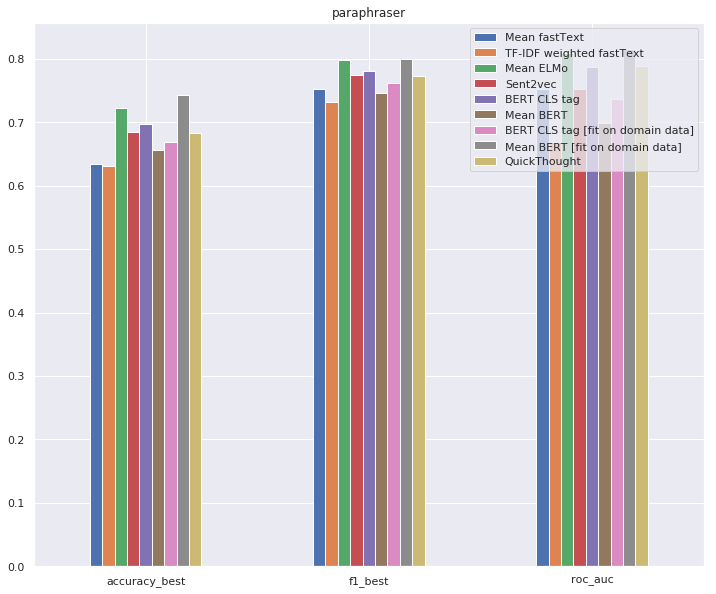

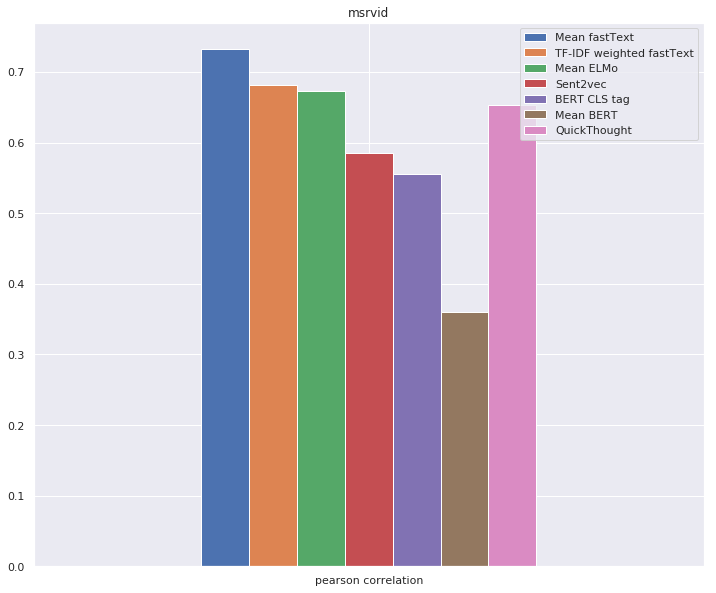

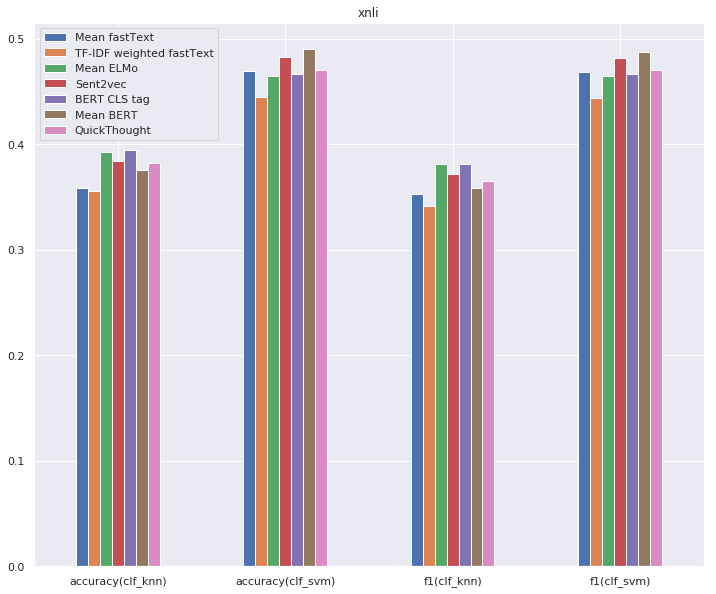

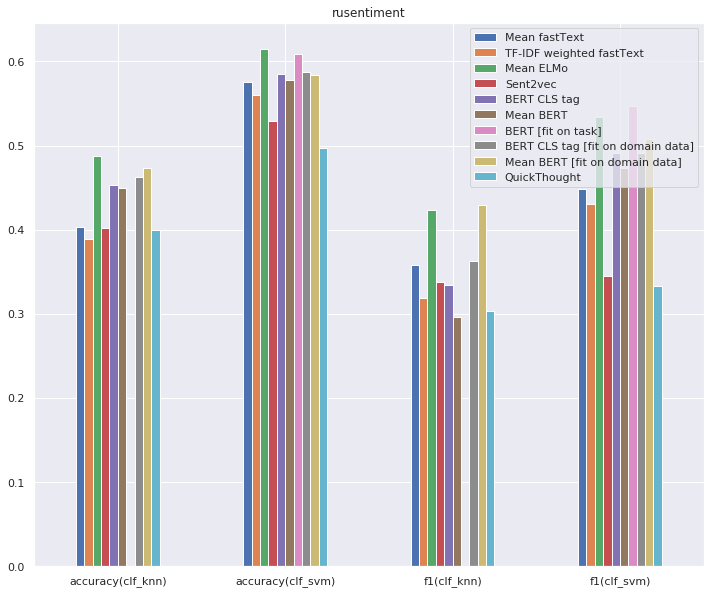

In [5]:
evaluator.plot_results(save=False, show=True, kind='bar', rot=0)